# KSA308 

## Week 1: Exploring the Southern Ocean with 2D data 

**Objectives:**

Introduce the physical context of the Southern Ocean relevant to understanding its role in the carbon cycle. 

- the cold temperatures and large temperature gradients impacting CO2 solubility; 
- the overturning circulation that connects the deep ocean carbon reservoir to the atmosphere; 
- the seasonal cycle of sea ice production and melt, which contributes to the circulation and impacts air sea gas exchange and biological productivity;  
- nutrient distributions that reflect the combined influence of circulation and biology; 
- biological productivity and HNLC nature of the SO;
- finally an introduction to carbon parameters in the SO. 


**Structure:**

Part 1: The physcal ocean (Temp, Sal, density, winds, currents, sea ice)

Part 2: The biological ocean (chl, nutrients)

Part 3: The carbonic (not sure this is a word) ocean (DIC, Alkalinity, pCO2)

Part 4: The connected ocean (bring it all together somehow)

**References:**

- Gray, Alison R. “The Four-Dimensional Carbon Cycle of the Southern Ocean.” Annual Review of Marine Science 16, no. 1 (2024): 163–90. https://doi.org/10.1146/annurev-marine-041923-104057. 


In [7]:
# import packages

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import gsw

# set path to data files on local directory
path_data = '/home/aoetjens/PhD/teaching/KSA308/data/'

# Part 1: The physical ocean


## Data access:

**1. Temperature**

a) Sea Surface Temperature (SST)
Download data from ocean color 
https://oceandata.sci.gsfc.nasa.gov/l3/

 Level 3, Aqua-MODIS whole mission composite, 9km

 File name:
 AQUA_MODIS.20020704_20250831.L3m.CU.SST.x_sst.nc

b) depth resolved Temperature and salinity
Source:
https://data.marine.copernicus.eu/product/MULTIOBS_GLO_PHY_TSUV_3D_MYNRT_015_012/download?dataset=dataset-armor-3d-rep-monthly_202012

Monthly, reanalysis product (this is only december)

File name:
dataset-armor-3d-rep-monthly_1759805143474.nc

**2. Wind and Ekman**


https://data.marine.copernicus.eu/product/MULTIOBS_GLO_PHY_MYNRT_015_003/download?dataset=cmems_obs-mob_glo_phy-cur_my_0.25deg_P1M-m_202411


monthly data, three years, create climatology, at surface and 15 m

## 1.1. The cold Southern Ocean

- why are we interested in  SST/depth-resolved T (focus on biology, temperature dependence on growth, but also fronts,circulation,...)
- how do we measure SST: satellite observations: large scale, upper ~15m, clouds
- depth resolved: ship data (CTD), Argo-floats,...






**Oceanic fronts:**

- Can we identify these fronts in the SST plot?
- what are possible implications for biology/nutrients?
-...


**Thermohaline circulation system:**

- can we identify the vertical structure in the section plots?
- ....


| Front              | Abbreviation | Approx. Latitude (°S) | Boundary Between           | Typical Criterion                   |
| ------------------ | ------------ | --------------------- | -------------------------- | ----------------------------------- |
| Subtropical Front  | STF          | 40–45                 | Subtropical / Subantarctic | SST or salinity gradient            |
| Subantarctic Front | SAF          | 48–52                 | SAZ / PFZ                  | θ ≈ 4 °C drop                       |
| Polar Front        | PF           | 52–58                 | PFZ / AZ                   | θ = 2 °C at surface                 |
| Southern ACC Front | SACCF        | 58–62                 | AZ / SZ                    | Deep temperature/salinity structure |
| Southern Boundary  | SBdy         | 62–65                 | ACC / Continental waters   | θ(2000 m) = 1.8 °C                  |




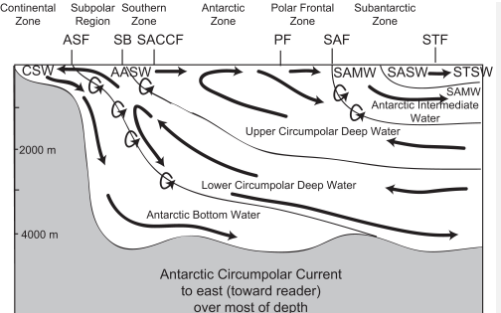

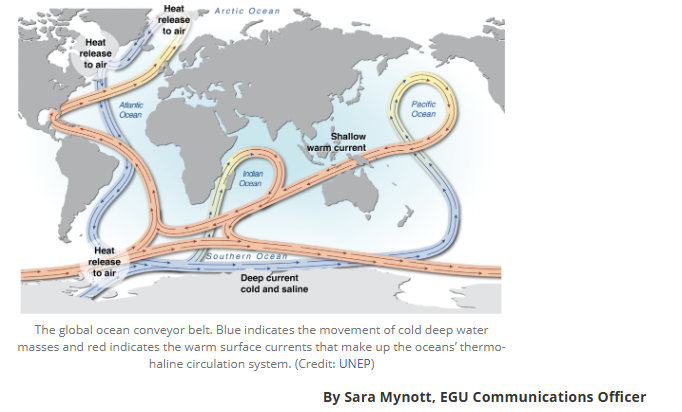

In [16]:
# Sea Surface Temperature (SST)

## data product: OceanColour compilation/monthly climatology
## fronts in the Southern Ocean, (overlay sea surface height contours?)

#read data with xarray

#path_data =  'put in correct file path here'
file = glob.glob(path_data +'*sst.nc')[0]
ds = xr.open_dataset(file, engine='h5netcdf')
print('File dimensions: ', ds.dims)
print('original shape: ', ds.sst.shape)

# downsample data for faster plotting and store sst data as 'sst'
sst = ds.sst.coarsen(lat=20, lon=20, boundary='trim').mean()
print('New shape: ',sst.shape)
ds.close()

File dimensions:  FrozenMappingWarningOnValuesAccess({'lat': 1440, 'lon': 8640, 'rgb': 3, 'eightbitcolor': 256})
original shape:  (1440, 8640)
New shape:  (72, 432)


### Plotting data

In [24]:
# preparing the map

def SouthPolarAxis(ax):
    theta = np.linspace(0, 2*np.pi, 100)
    map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])
    extent = [-180, 180, -90, -45]
    ax.set_extent(extent, ccrs.PlateCarree())
    ax.set_facecolor([0.95, 0.95, 0.95])
    ax.set_boundary(map_circle, transform=ax.transAxes)
    # add coastlines 
    ax.coastlines(resolution = "50m",zorder = 11, linewidth = 1, color='dimgrey')
    ax.add_feature(cft.LAND, color='silver', lw=0.3, zorder=10) #cfeature.COLORS['land_alt1']
    # add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='black', alpha=1, zorder=10)
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}

    return ax, gl

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_105869/423957005.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.colorbar(sst_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label ='SST [$^{\circ}$ C]',size=12)


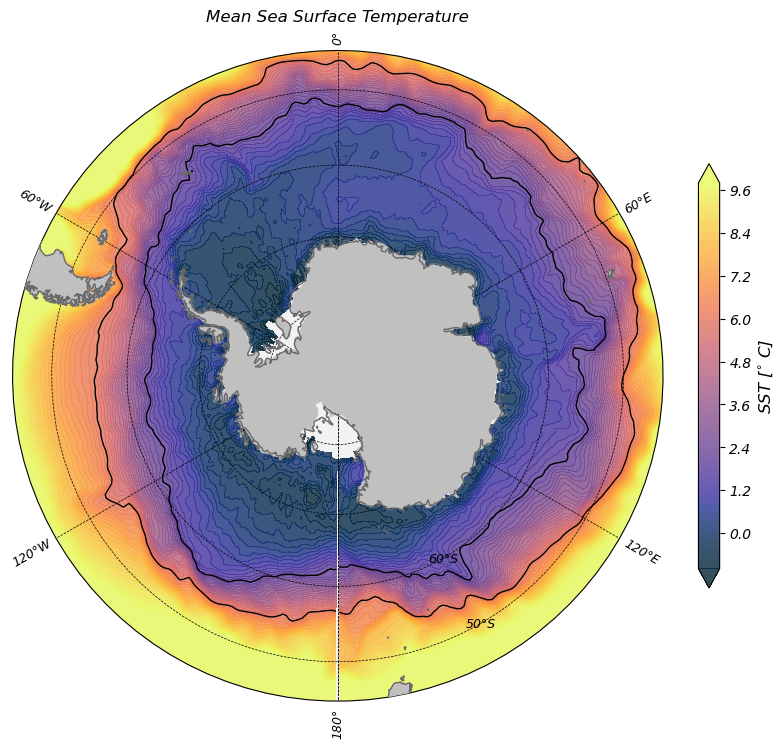

In [28]:
# initialize figure and axis
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax, gl = SouthPolarAxis(ax)

# plot sea surface temperature (SST)
levs =np.arange(-1,10,0.2)
sst_plot = ax.contourf(sst.lon.data, sst.lat.data, sst.data, levs, transform=ccrs.PlateCarree(), extend='both', cmap = 'cmo.thermal',alpha = 0.8)
# add contour lines to identify fronts
sst_con = ax.contour(sst.lon.data, sst.lat.data, sst.data,[2,6], colors = ['black'],linestyles=['-'],linewidths=[1], transform=ccrs.PlateCarree(), alpha=1)
#ax.clabel(sst_con, fmt='%2.0f', colors = 'black', fontsize=8)
# add 

plt.colorbar(sst_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label ='SST [$^{\circ}$ C]',size=12)
plt.title('Mean Sea Surface Temperature', size=12)
plt.tight_layout()
plt.show()

In [ ]:
# Depth resolved Temperature

#path_data =  'put in correct file path here'
file = glob.glob(path_data +'dataset-armor-3d-*.nc')[0]
ds = xr.open_dataset(file,engine='h5netcdf')
print('original shape: ', ds.dims)

ds


# section plots


# compute density with gsw
# https://teos-10.github.io/GSW-Python/
# absolute/conservative temp/salinity
# gsw.density.rho(SA, CT, p)
#Calculates in-situ density from Absolute Salinity and Conservative Temperature, 
# using the computationally-efficient expression for specific volume in terms of SA, CT and p (Roquet et al., 2015).


# we have practical salinity and in-situ temperature and depth
# we need to convert practical salinity to absolute salinity and in-situ temperature to conservative temperature
# we also need pressure from depth

# we use gsw.p_from_z(z, lat) to get pressure from depth
# z is negative depth in m (i.e. -depth)
# lat is latitude in decimal degrees north
# we use gsw.SA_from_SP(SP, p, lon, lat) to
# convert practical salinity to absolute salinity
# SP is practical salinity in psu   
# p is sea pressure in dbar
# lon is longitude in decimal degrees east
# lat is latitude in decimal degrees north
# we use gsw.CT_from_t(SA, t, p) to convert in-situ temperature to conservative temperature
# SA is absolute salinity in g/kg
# t is in-situ temperature in deg C (ITS-90)
# p is sea pressure in dbar         




# plot different sections


## 1.2. The windy ocean

- role of winds in currents and circulation
- how do we measure winds
- Ekman upwelling






**Surface currents:**

- ...


**Ekman upwelling:**

- what are possible implications for biology/nutrients?
- ....


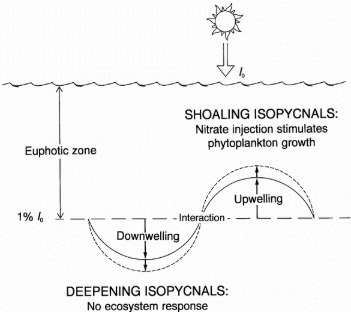


In [ ]:
# read in data 

# plot data



## 1.3 The icy ocean

- sea ice extent

**Summer/winter:**

- meltwater, stratification, mixing?


**Source of nutrients:**

- what role does sea ice play in the life cycle of phtoplankton (no light, nutrient source, iron)?
- what role does it play in the air-sea gas exchange?


In [ ]:
# read in data

# plot data, one for winter, one for summer, or just one plot with 

# Part 2: The biological ocean


## Data access:

**1. Nutrients**

a) Nitrate, Silicate, Phosphatea

Download data from World Oceaan Atlas (WOA)
https://www.ncei.noaa.gov/access/world-ocean-atlas-2023/

1 degree, annual data

 File names:
 woa23_all_n00_01.nc
 woa23_all_i00_01.nc
 woa23_all_p00_01.nc

b) Surface chlorophyll

Download data from Ocean Color

Mclimatology/or seasonal climatology/ maybe summer and winter

File name:

 

### 2.2. The high nutrient Ocean


In [89]:
# Nutrients

## what is it, how is it measured
## data product: Oceancolour compilation/monthly climatology
## fronts in the Southern Ocean, combine with sea surface height and ice

# a) Download data from World Oceaan Atlas (WOA)

# https://www.ncei.noaa.gov/access/world-ocean-atlas-2023/

# 1 degree, annual data


# b) store data in a local folder



# c) read data with xarray


# Nitrate
file = glob.glob(path_data +'woa23_all_n00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
no3_avg = ds.isel(time=0).n_an
no3_samples = ds.isel(time=0).sel(depth=0, method='nearest').n_mn
ds.close()


# Phosphate
file = glob.glob(path_data +'woa23_all_p00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
po4_avg = ds.isel(time=0).p_an
po4_samples = ds.isel(time=0).sel(depth=0, method='nearest').p_mn
ds.close()


file = glob.glob(path_data +'woa23_all_i00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
si_avg = ds.isel(time=0).i_an
si_samples = ds.isel(time=0).sel(depth=0, method='nearest').i_mn
ds.close()


no3_avg
#  same for phosphate and silicate

/home/aoetjens/PhD/teaching/KSA308/data/woa23_all_n00_01.nc
original shape:  FrozenMappingWarningOnValuesAccess({'depth': 102, 'bounds_dim': 2, 'time': 1, 'lat': 61, 'lon': 360})
/home/aoetjens/PhD/teaching/KSA308/data/woa23_all_p00_01.nc
original shape:  FrozenMappingWarningOnValuesAccess({'depth': 102, 'bounds_dim': 2, 'time': 1, 'lat': 61, 'lon': 360})
/home/aoetjens/PhD/teaching/KSA308/data/woa23_all_i00_01.nc
original shape:  FrozenMappingWarningOnValuesAccess({'depth': 102, 'bounds_dim': 2, 'time': 1, 'lat': 61, 'lon': 360})


<xarray.DataArray 'n_an' (depth: 102, lat: 61, lon: 360)> Size: 9MB
[2239920 values with dtype=float32]
Coordinates:
  * depth    (depth) float32 408B 1.25 5.0 10.0 ... 5.3e+03 5.4e+03 5.475e+03
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 4B 3.894e+03
  * lat      (lat) float32 244B -89.5 -88.5 -87.5 -86.5 ... -31.5 -30.5 -29.5
Attributes:
    standard_name:  moles_of_nitrate_per_unit_mass_in_sea_water
    long_name:      Objectively analyzed mean fields for moles_of_nitrate_per...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          micromoles_per_kilogram

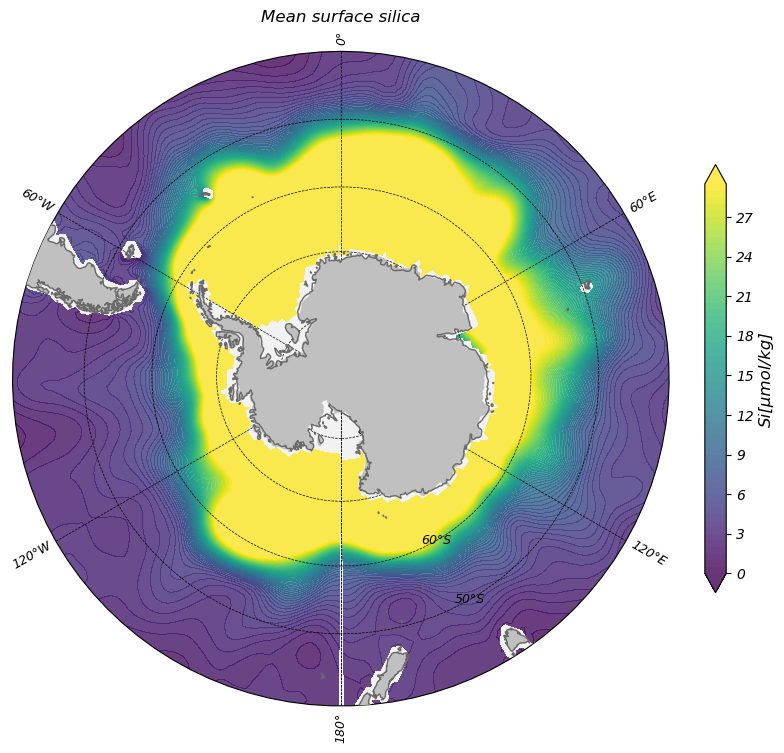

In [94]:


#no3_avg.sel(depth=10).plot(alpha=0.3)
#no3_samples.sel(depth=10).plot()
param = si_avg.sel(depth=0, method='nearest')
param_label = 'Si[µmol/kg]'  #'NO$_{3}$ [µmol/kg]'
param_title = 'Mean surface silica' #'Mean surface nitrate'

# initialize figure and axis
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax, gl = SouthPolarAxis(ax)

# plot nitrate (NO3)
levs =np.arange(0,30,0.5)

param_plot = ax.contourf(param.lon.data, param.lat.data, param.data, levs, transform=ccrs.PlateCarree(), extend='both', cmap = 'viridis',alpha = 0.8)
# add nitrate sampling points
# no3_samples.plot(ax=ax,transform=ccrs.PlateCarree(), vmin=0,vmax=30,add_colorbar=False)

# add contour lines to identify fronts (probably with ssh)
#sst_con = ax.contour(sst.lon.data, sst.lat.data, sst.data,[0,5,7,10], colors = ['black'],linestyles=['-'],linewidths=[1], transform=ccrs.PlateCarree(), alpha=1)
#ax.clabel(sst_con, fmt='%2.0f', colors = 'black', fontsize=8)
# add 

plt.colorbar(param_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label = param_label,size=12)
plt.title(param_title, size=12)
plt.tight_layout()
plt.show()

## 2.2 The low chlorophyll Ocean

HNLC concept

# Part 3: The carbonic ocean


## Data access:

**1. DIC**

**2. pCO2**

**3. Alkalinity**

In [ ]:
# section plots
# how to convert between carbonate system variables
# ...